In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/query_output/query_3_new.csv', index_col=False)
df.head()

,PLAYER_NAME,SEASON_GOALS,SEASON_YELLOWS,SEASON_REDS,SEARCHES,SEARCH_RANK,PLAYER_EVENTS,PLAYER_EVENT_RANK
0,asamoah,1,4.0,1.0,0,44,6.0,1.0
1,ronaldo,3,2.0,0.0,18,26,5.0,2.0
2,klose,5,0.0,0.0,7,37,5.0,2.0
3,deco,1,3.0,1.0,6,38,5.0,2.0
4,zidane,1,3.0,1.0,3,41,5.0,2.0


In [3]:
df = df.dropna()

In [4]:
for column in df.columns:
    if df[column].dtype == 'float64':
        df[column] = df[column].astype(int)

In [11]:
df.head()

,PLAYER_NAME,SEASON_GOALS,SEASON_YELLOWS,SEASON_REDS,SEARCHES,SEARCH_RANK,PLAYER_EVENTS,PLAYER_EVENT_RANK
0,asamoah,1,4,1,0,44,6,1
1,ronaldo,3,2,0,18,26,5,2
2,klose,5,0,0,7,37,5,2
3,deco,1,3,1,6,38,5,2
4,zidane,1,3,1,3,41,5,2


In [14]:
top_scorer1 = df[['PLAYER_NAME', 'SEARCH_RANK', 'PLAYER_EVENT_RANK']].sort_values(by='PLAYER_EVENT_RANK').head(10)
top_scorer1.set_index('PLAYER_NAME', inplace=True)
top_scorer1

,SEARCH_RANK,PLAYER_EVENT_RANK
PLAYER_NAME,,
asamoah,44,1
ronaldo,26,2
klose,37,2
deco,38,2
zidane,41,2
jaziri,44,2
costinha,44,2
lucic,44,3
nadj,44,3


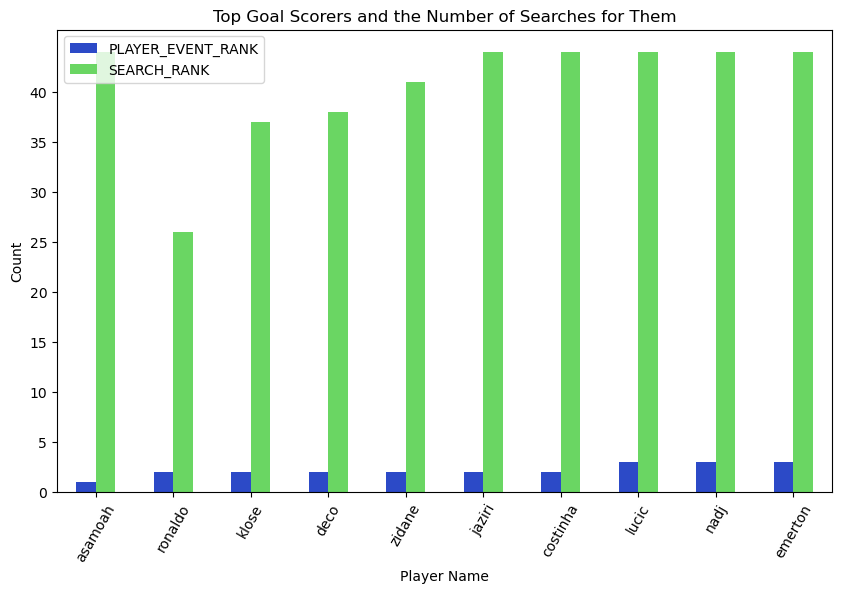

In [17]:
top_scorer1[['PLAYER_EVENT_RANK', 'SEARCH_RANK']].plot(kind='bar', 
                                                               figsize=(10, 6),
                                                               color=['#2C4AC7', '#6AD663'])

# find max_y values
max_pe = max(top_scorer1.SEARCH_RANK)
max_se = max(top_scorer1.PLAYER_EVENT_RANK)

max_value = max([max_pe, max_se])

# Set plot title and labels
plt.title('Top Goal Scorers and the Number of Searches for Them')
plt.xlabel('Player Name')
plt.ylabel('Count')

# Set y-axis ticks
plt.yticks(range(0, max_value + 1, 5)) 

# Rotate x-axis labels
plt.xticks(rotation=60)

plt.savefig('../Visuals/plots/query_3_2.png', bbox_inches='tight')

# Display the plot
plt.show()

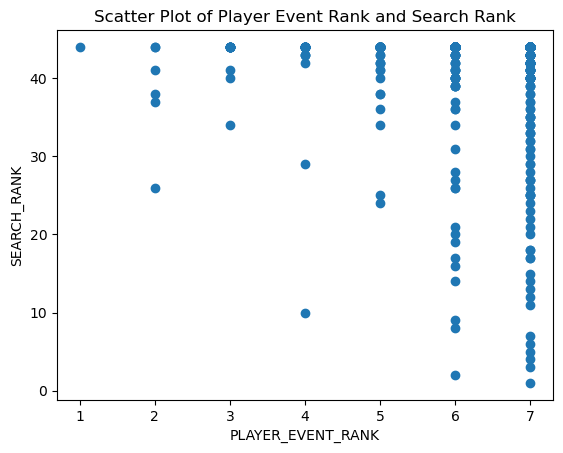

In [6]:
plt.scatter(df['PLAYER_EVENT_RANK'], df['SEARCH_RANK'])

# Add labels and title
plt.xlabel('PLAYER_EVENT_RANK')
plt.ylabel('SEARCH_RANK')
plt.title('Scatter Plot of Player Event Rank and Search Rank')

plt.savefig('../Visuals/plots/query_3_1.png', bbox_inches='tight')

# Show the plot
plt.show()

In [32]:
df['PLAYER_EVENTS'].corr(df['SEARCHES'])

-0.03486853863162565

In [18]:
top_scorer = df[['PLAYER_NAME', 'SEASON_GOALS', 'SEARCHES', 'PLAYER_EVENTS']].sort_values(by='SEASON_GOALS', 
                                                                                          ascending=False).head(10)
top_scorer.set_index('PLAYER_NAME', inplace=True)
top_scorer

,SEASON_GOALS,SEARCHES,PLAYER_EVENTS
PLAYER_NAME,,,
klose,5,7,5
rodriguez,3,10,4
ronaldo,3,18,5
crespo,3,3,4
podolski,3,0,4
henry,3,15,3
vieira,2,2,3
schweinsteiger,2,0,3
gerrard,2,0,3


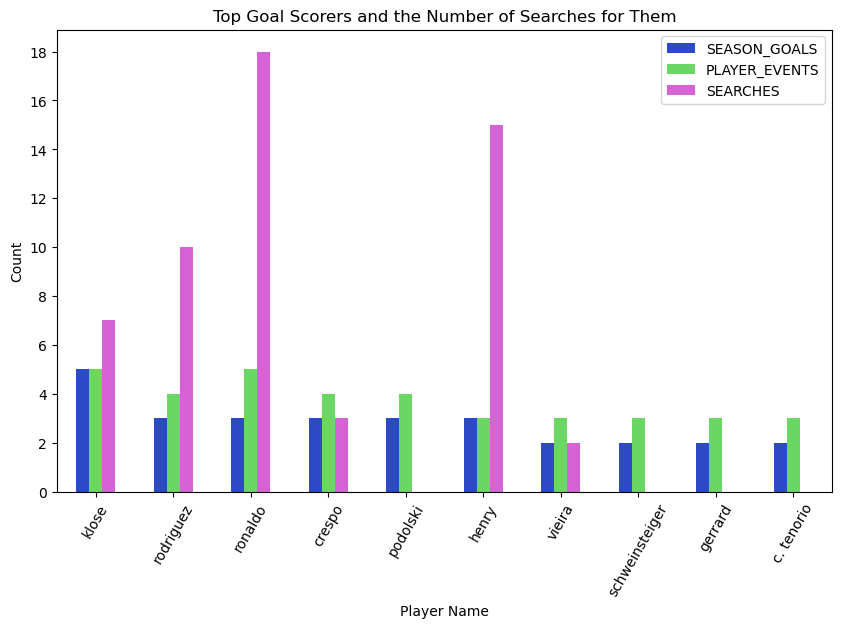

In [30]:
# Grouped bar plot
top_scorer[['SEASON_GOALS', 'PLAYER_EVENTS', 'SEARCHES']].plot(kind='bar', 
                                                               figsize=(10, 6),
                                                               color=['#2C4AC7', '#6AD663', '#D663D6'])

# find max_y values
max_sg = max(top_scorer.SEASON_GOALS)
max_pe = max(top_scorer.PLAYER_EVENTS)
max_se = max(top_scorer.SEARCHES)

max_value = max([max_sg, max_pe, max_se])

# Set plot title and labels
plt.title('Top Goal Scorers and the Number of Searches for Them')
plt.xlabel('Player Name')
plt.ylabel('Count')

# Set y-axis ticks
plt.yticks(range(0, max_value + 1, 2)) 

# Rotate x-axis labels
plt.xticks(rotation=60)

plt.savefig('../Visuals/plots/query_6_1.png', bbox_inches='tight')

# Display the plot
plt.show()

In [26]:
top_search_player = df[['PLAYER_NAME', 
                        'SEARCHES',
                        'PLAYER_EVENTS', 
                        'SEASON_GOALS']].sort_values(by='SEARCHES', ascending=False).head(10)

top_search_player.set_index('PLAYER_NAME', inplace=True)

top_search_player

,SEARCHES,PLAYER_EVENTS,SEASON_GOALS
PLAYER_NAME,,,
bridge,616,0,0
ho,398,1,0
scotland,260,0,0
cox,194,0,0
ronaldinho,126,0,0
james,99,0,0
johnson,98,0,0
alex,76,1,0
jones,71,1,0


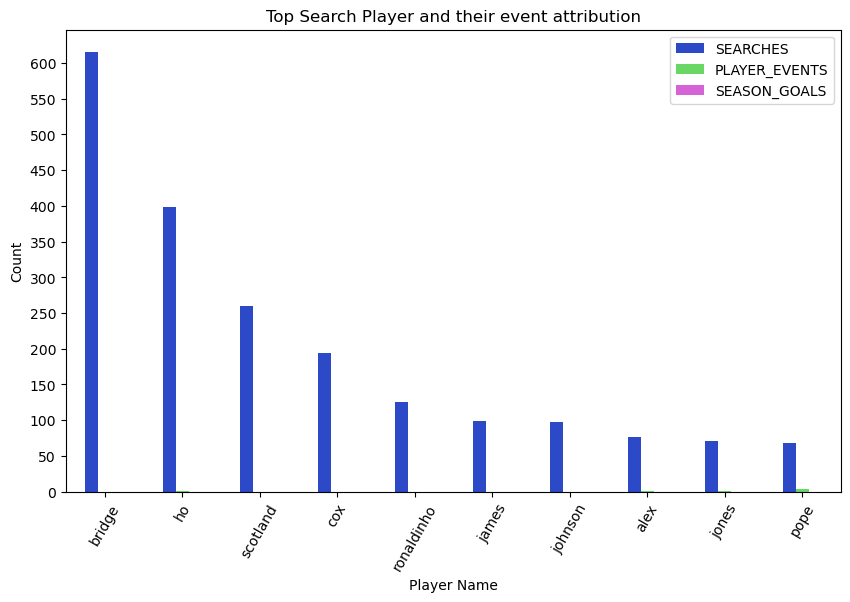

In [31]:
# Grouped bar plot
top_search_player[['SEARCHES', 'PLAYER_EVENTS', 'SEASON_GOALS']].plot(kind='bar', 
                                                               figsize=(10, 6),
                                                               color=['#2C4AC7', '#6AD663', '#D663D6'])

# find max_y values
max_sg = max(top_search_player.SEASON_GOALS)
max_pe = max(top_search_player.PLAYER_EVENTS)
max_se = max(top_search_player.SEARCHES)

max_value = max([max_sg, max_pe, max_se])

# Set plot title and labels
plt.title('Top Search Player and their event attribution')
plt.xlabel('Player Name')
plt.ylabel('Count')

# Set y-axis ticks
plt.yticks(range(0, max_value + 1, 50)) 

# Rotate x-axis labels
plt.xticks(rotation=60)

plt.savefig('../Visuals/plots/query_6_2.png', bbox_inches='tight')

# Display the plot
plt.show()